<a href="https://colab.research.google.com/github/maurofama99/c-frames/blob/main/evaluation/cframes_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Libraries import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Design
## Policy
> ### Report
*   On Frame **Update**
*   On Frame **Close**

> ### Evict
*   Single Buffer: After **X** Frames created, evict **Y** frames
*   Multi Buffer: After **X** ms passed, evict **Y** frames
## Content and Report
With FRAMES, these two methods are managed differently w.r.t. time-driven windows. In the data-driven case, when `content` extracts the Frame of the current processed tuple, depending on the Report Policy it can happen that it is not the same content that should be reported. For instance, if the Report Policy is *On Close*, the extracted content is the just opened Frame containing only the tuple that made the last Frame being closed, instead, the reported content should be the frame of the previous processed tuple. Because of this, the `report` should not be performed on the extracted content, but on the last closed frame. In order to generalize this, for every tuple we process, we keep track and save (the timestamp of) the Frame that should be reported, that indeed could not be (the timestamp of) the Frame of the current processed tuple. With this design, `content` do not extract anymore the Frame of the current tuple every `tick`, but extract the content of the pointed Frame every time a particular action is performed.
## Linked List and Binary Search
To implement the single buffer, we used a Linked List, instead, Binary Search algorithm is designed for array-like data structure. For this reason, even if the buffer is sorted, we cannot achieve an exact *O(logn)* time complexity, but still a sub-linear time complexity. \
https://stackoverflow.com/questions/5281053/how-to-apply-binary-search-olog-n-on-a-sorted-linked-list

# Plot functions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

path = '/content/drive/My Drive/cframes/'

In [ ]:
def plot_nlogn(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, base):
    for method in methods:

        x = df[dimension]
        y = df[[method]]

        # discard all skipped iterations
        x = x[y[method] != -1]
        y = y[y[method] != -1]

        # Calcolo della media ogni tot elementi di y
        y_averaged = [np.mean(y[i:i+elements_to_average]) for i in range(0, len(y), elements_to_average)]

        # Ridimensionamento degli elementi x per corrispondere alla nuova dimensione di y
        x_averaged = np.linspace(min(x), max(x), len(y_averaged))

        # Plot dei risultati
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, label=f'Raw {method} exec. time (ms)', alpha = 0.3, color = 'lightgreen', s = 1)
        plt.plot(x_averaged, y_averaged, label=f'Mean every {elements_to_average} measurments', marker='o', linestyle='-', color = 'blue')
        plt.plot(df[base], (x*np.log(x)*scale_factor)+vertical_traslation, label=f'{dimension}log{dimension}', color = 'red', linestyle='--')
        plt.legend()
        plt.ylabel('Execution time (ms)')
        plt.xlabel(f'Performed {method}s')
        plt.title(f'{method} time complexity')
        plt.show()


In [ ]:
def plot_n(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, base):
    for method in methods:

        x = df[dimension]
        y = df[[method]]
        base_ref = df[base]

        # discard all skipped iterations
        x = x[y[method] != -1]
        base_ref = base_ref[y[method] != -1]
        y = y[y[method] != -1]

        # Calcolo della media ogni tot elementi di y
        y_averaged = [np.mean(y[i:i+elements_to_average]) for i in range(0, len(y), elements_to_average)]

        # Ridimensionamento degli elementi x per corrispondere alla nuova dimensione di y
        x_averaged = np.linspace(min(x), max(x), len(y_averaged))

        # Plot dei risultati
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, label=f'Raw {method} exec. time (ms)', alpha = 0.3, color = 'lightgreen', s = 1)
        plt.plot(x_averaged, y_averaged, label=f'Mean every {elements_to_average} measurments', marker='o', linestyle='-', color = 'blue')
        plt.plot(x, (x*scale_factor)+vertical_traslation, label=f'{dimension}', color = 'red', linestyle='--')
        plt.legend()
        plt.ylabel('Execution time (ms)')
        plt.xlabel(f'Performed {method}s')
        plt.title(f'{method} time complexity')
        plt.show()

In [ ]:
def plot_logn(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, base):
    for method in methods:

        x = df[dimension]
        y = df[[method]]

        # discard all skipped iterations
        x = x[y[method] != -1]
        y = y[y[method] != -1]

        # Calcolo della media ogni tot elementi di y
        y_averaged = [np.mean(y[i:i+elements_to_average]) for i in range(0, len(y), elements_to_average)]

        # Ridimensionamento degli elementi x per corrispondere alla nuova dimensione di y
        x_averaged = np.linspace(min(x), max(x), len(y_averaged))

        # Plot dei risultati
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, label=f'Raw {method} exec. time (ms)', alpha = 0.3, color = 'lightgreen', s = 1)
        plt.plot(x_averaged, y_averaged, label=f'Mean every {elements_to_average} measurments', marker='o', linestyle='-', color = 'blue')
        plt.plot(df[base], (np.log(x)*scale_factor)+vertical_traslation, label=f'log{dimension}', color = 'red', linestyle='--')
        plt.legend()
        plt.ylabel('Execution time (ms)')
        plt.xlabel(f'Performed {method}s')
        plt.title(f'{method} time complexity')
        plt.show()

In [ ]:
def plot_nq(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, base):
    for method in methods:

        x = df[dimension]
        y = df[[method]]
        base_ref = df[base]

        # discard all skipped iterations
        x = x[y[method] != -1]
        base_ref = base_ref[y[method] != -1]
        y = y[y[method] != -1]

        # Calcolo della media ogni tot elementi di y
        y_averaged = [np.mean(y[i:i+elements_to_average]) for i in range(0, len(y), elements_to_average)]

        # Ridimensionamento degli elementi x per corrispondere alla nuova dimensione di y
        x_averaged = np.linspace(min(x), max(x), len(y_averaged))

        # Plot dei risultati
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, label=f'Raw {method} exec. time (ms)', alpha = 0.3, color = 'lightgreen', s = 1)
        plt.plot(x_averaged, y_averaged, label=f'Mean every {elements_to_average} measurments', marker='o', linestyle='-', color = 'blue')
        plt.plot(x, (x*base_ref*scale_factor)+vertical_traslation, label=f'{dimension}*{base}', color = 'red', linestyle='--')
        plt.legend()
        plt.ylabel('Execution time (ms)')
        plt.xlabel(f'Performed {method}s')
        plt.title(f'{method} time complexity')
        plt.show()

# Single buffer

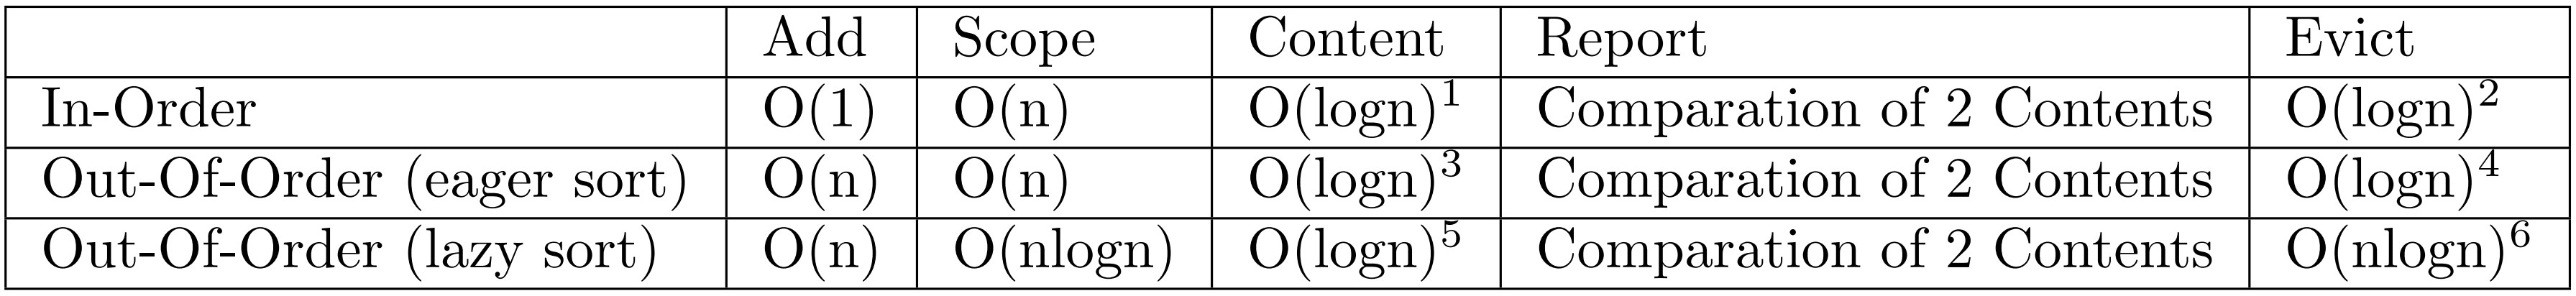
n = size of buffer \
lazy sort: buffer not ordered add in O(1)

## In-Order

In [ ]:
file_name = 'output_SB_IO.csv'
df = pd.read_csv(path + file_name)

In [ ]:
scale_factor = 0.00016
vertical_traslation = 0
elements_to_average = 5000
methods = ['add','scope']
dimension = 'n'

plot_n(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'n')

In [ ]:
scale_factor = 0.00016
vertical_traslation = 0
elements_to_average = 5000
methods = ['content','evict']
dimension = 'n'

plot_logn(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'n')

## Out-of-Order (eager sort)

In [ ]:
file_name = 'output_SB_OOOE.csv'
df = pd.read_csv(path + file_name)

In [ ]:
scale_factor = 0.00016
vertical_traslation = 0
elements_to_average = 5000
methods = ['add','scope']
dimension = 'n'

plot_n(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'n')

## Out-of-Order (lazy sort)

In [ ]:
file_name = 'output_SB_OOOL.csv'
df = pd.read_csv(path + file_name)

In [ ]:
scale_factor = 0.00016
vertical_traslation = 0
elements_to_average = 5000
methods = ['add']
dimension = 'n'

plot_n(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'n')

In [ ]:
scale_factor = 0.00016
vertical_traslation = 0
elements_to_average = 5000
methods = ['scope']
dimension = 'n'

plot_nlogn(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'n')

# Multi-Buffer

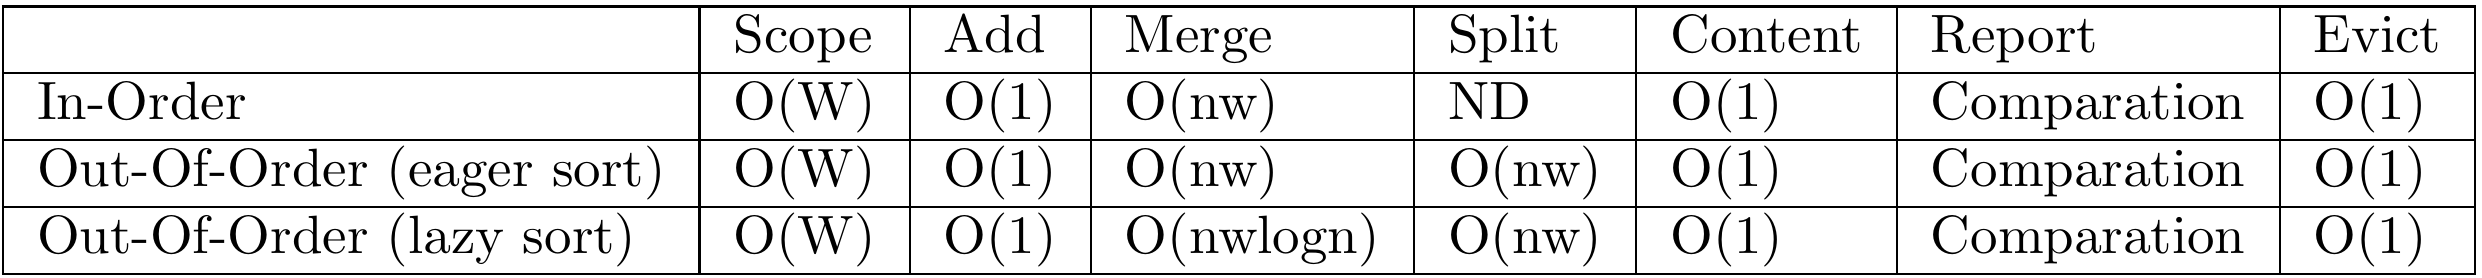
n = size of buffer, w = number of buffers, W = w + freshly created buffers

## In-Order

In [ ]:
file_name = 'output_0_1_-1.csv'
df = pd.read_csv(path + file_name)

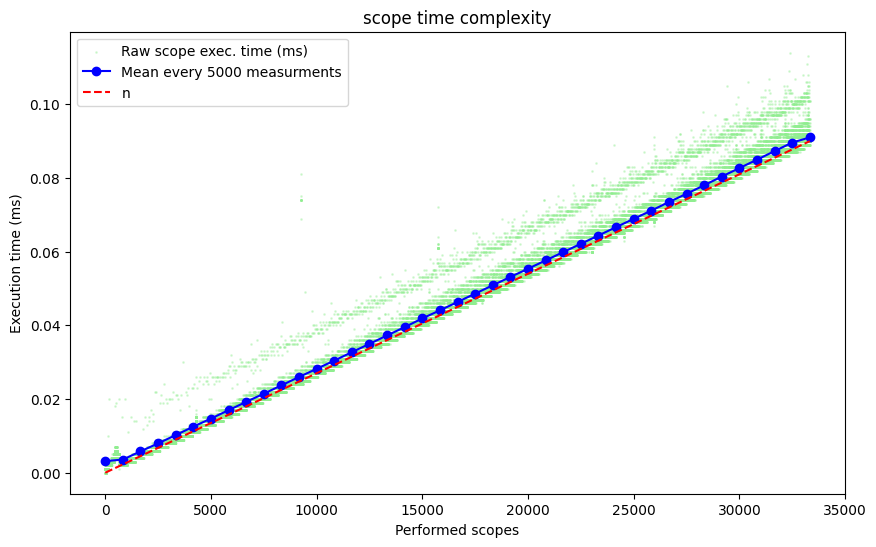

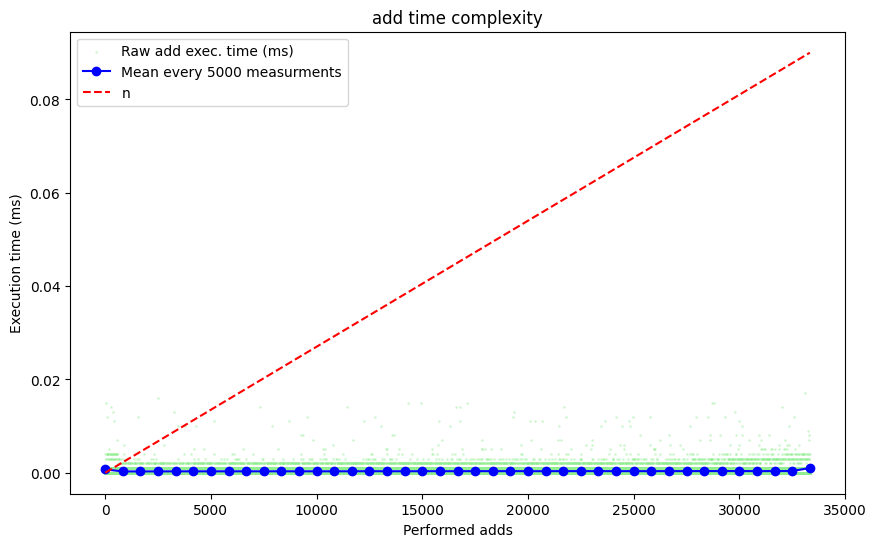

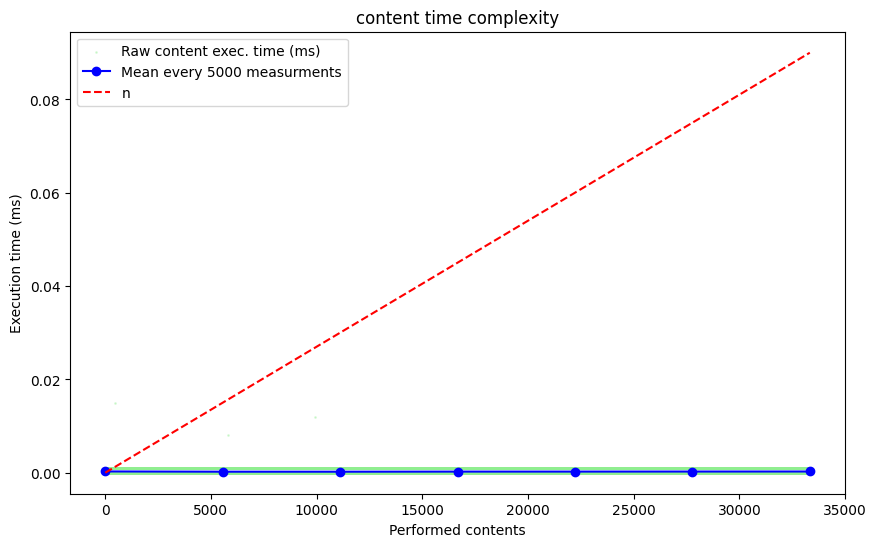

In [ ]:
scale_factor = 0.0000027
vertical_traslation = 0
elements_to_average = 5000
methods = ['scope', 'add', 'content']
dimension = 'n'

plot_n(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'n')

## Out-of-Order

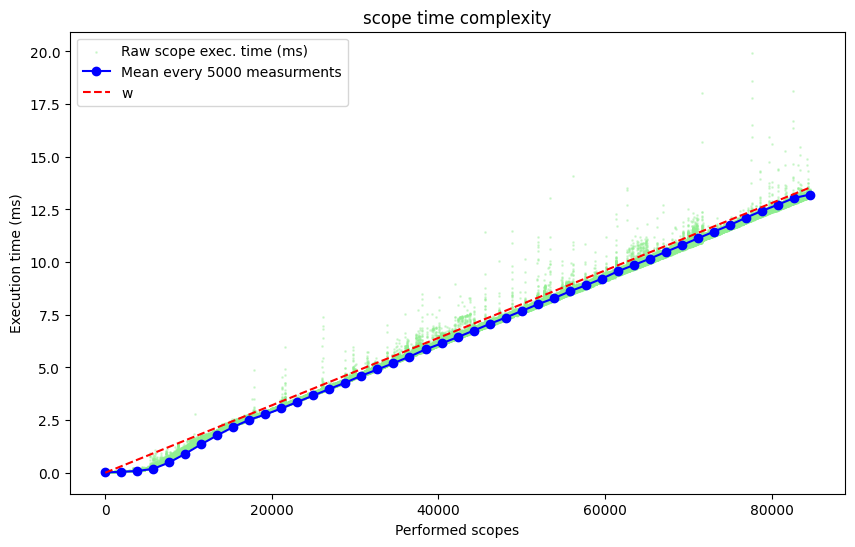

In [ ]:
file_name = 'output_MB_OOO.csv'
df = pd.read_csv(path + file_name)

scale_factor = 0.00016
vertical_traslation = 0
elements_to_average = 5000
methods = ['scope']
dimension = 'w'

plot_n(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'w')

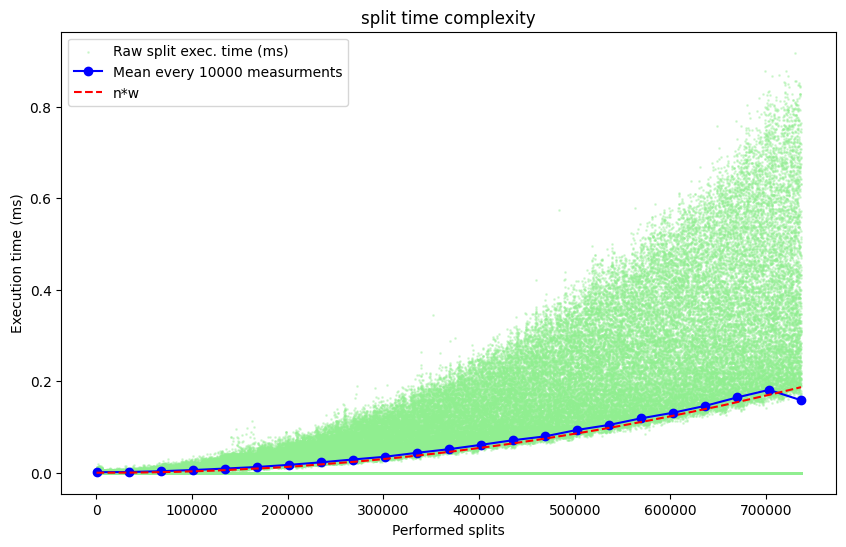

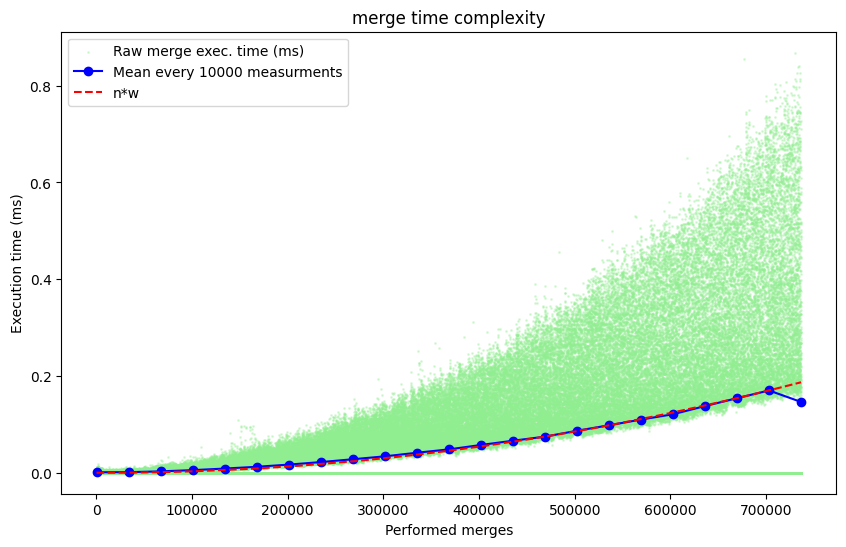

In [ ]:
file_name = 'output_MB_OOO.csv'
df = pd.read_csv(path + file_name)
df['nw'] = df['n']*df['w']

scale_factor = 0.000000000003
vertical_traslation = 0
elements_to_average = 10000
methods = ['split', 'merge']
dimension = 'n'

plot_nq(df, scale_factor, vertical_traslation, elements_to_average, methods, dimension, 'w')

